# Cuaderno de Isac Añor Santana

# Paquetes necesarios

In [91]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

In [92]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])

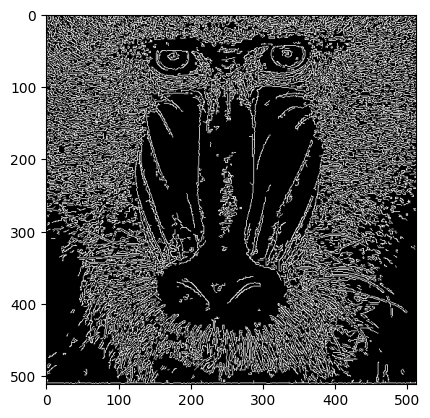

(0.0, 512.0)

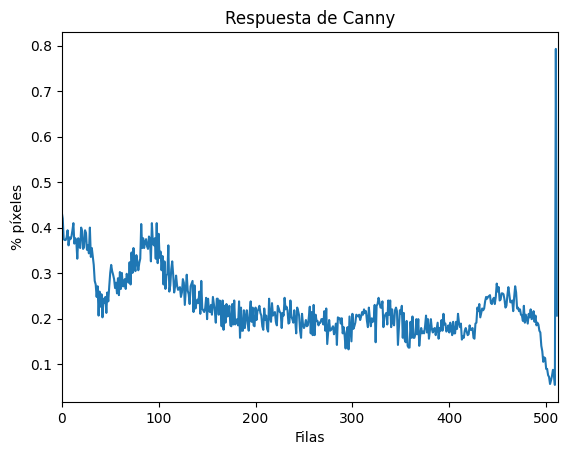

In [93]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
row_counts = row_counts.transpose()
rows = row_counts[0] / (255 * canny.shape[0])


#Muestra dicha cuenta gráficamente
plt.imshow(canny, cmap='gray') 
plt.show()
plt.figure()
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, gris.shape[0]])

In [94]:
# Máximo por columnas
col_max = np.where(cols == np.amax(cols))
print("Columnas con el máximo número de pixeles blancos: ", col_max[0])

# Máximo por filas
# Se desprecia la parte aislada (outlier) de las filas, es decir, hasta la fila 510.
rows = rows[0:510]
row_max = np.where(rows == np.amax(rows))
print("Filas con el máximo número de pixeles blancos:", row_max[0])

# Columnas con un alto número de pixeles blancos
col_max = np.where(cols >= 0.95*np.amax(cols))
print("Columnas con un número de pixeles blancos que superan el 0.95*maximo: ", col_max[0])

# Filas con un alto número de pixeles blancos
row_max = np.where(rows >= 0.95*np.amax(rows))
print("Filas con un número de pixeles blancos que superan el 0.95*maximo: ", row_max[0])

Columnas con el máximo número de pixeles blancos:  [105 396]
Filas con el máximo número de pixeles blancos: [0]
Columnas con un número de pixeles blancos que superan el 0.95*maximo:  [ 94 105 110 112 131 381 386 396]
Filas con un número de pixeles blancos que superan el 0.95*maximo:  [0 1]


Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel permite calcular dicha derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]

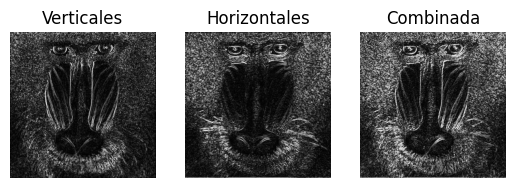

In [95]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobely, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

## TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

In [96]:
#Lee imagen de archivo
dentist_waiting_room = cv2.imread('dentista.jpg')
#Conversión a grises de la original en BGR
gray_dentist_waiting_room = cv2.cvtColor(dentist_waiting_room, cv2.COLOR_BGR2GRAY)

Sin desenfoque gaussiano

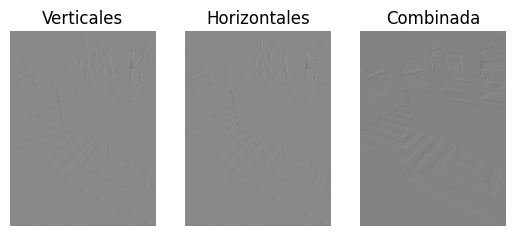

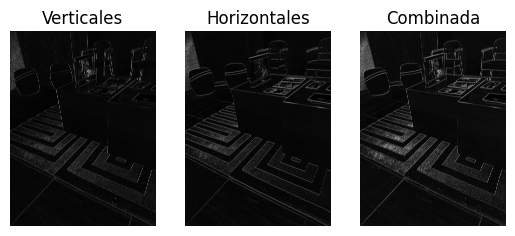

In [97]:
#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(gray_dentist_waiting_room, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(gray_dentist_waiting_room, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados sin ajustar la escala
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

# --------------------------------------------------------------------
#Muestra ambos resultados convirtiendo a escala
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray')
plt.show()

Con desenfoque gaussiano

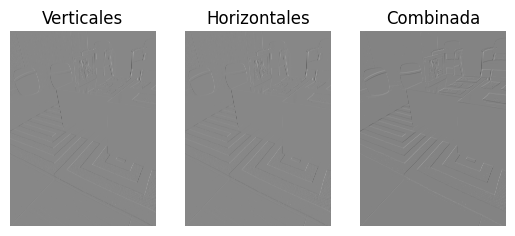

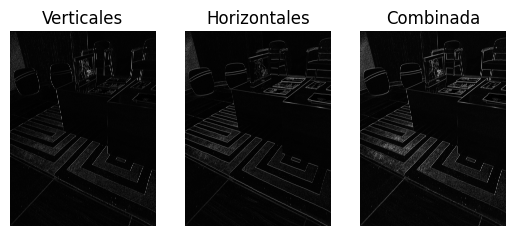

In [98]:
# Gaussiana para suavizar la imagen original
gaussian_blurred_gray_dentist_waiting_room = cv2.GaussianBlur(gray_dentist_waiting_room, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(gaussian_blurred_gray_dentist_waiting_room, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(gaussian_blurred_gray_dentist_waiting_room, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados sin convertir a escala
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

# --------------------------------------------------------------------
#Muestra ambos resultados convirtiendo a escala
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray')
plt.show()

## TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 o 255), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Ejemplo de umbralizado utilizando 127 como valor umbral

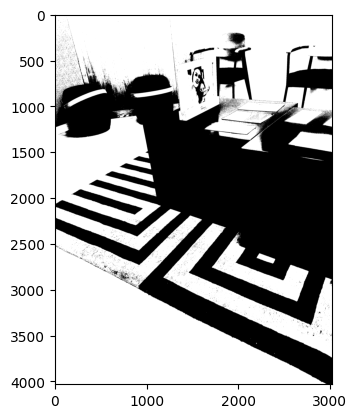

In [99]:
#Define valor umbral
valorUmbral = 127 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gray_dentist_waiting_room, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Observación del histograma para determinar un nuevo valor umbral

(0.0, 256.0)

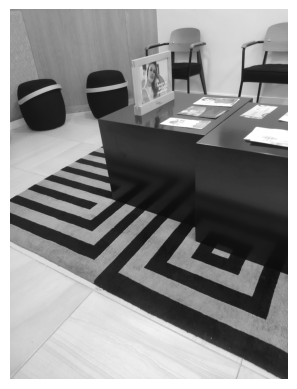

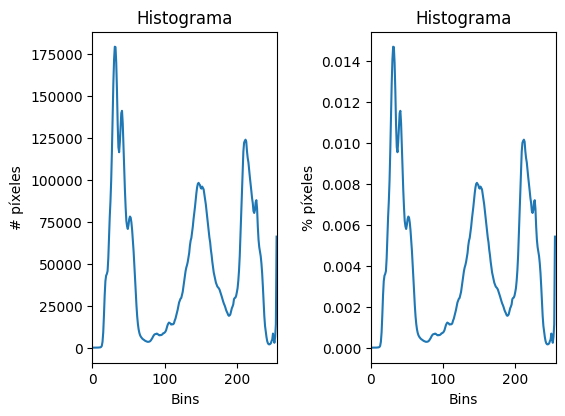

In [100]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gray_dentist_waiting_room], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gray_dentist_waiting_room, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

Se seguirá usando un valor umbral de 127

### Aplicación de umbralizado a la imagen resultante de Sobel

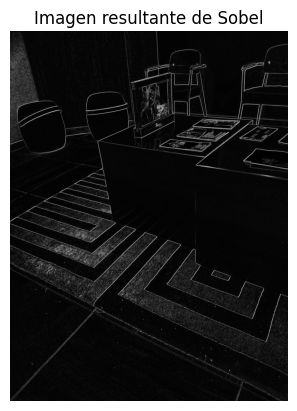

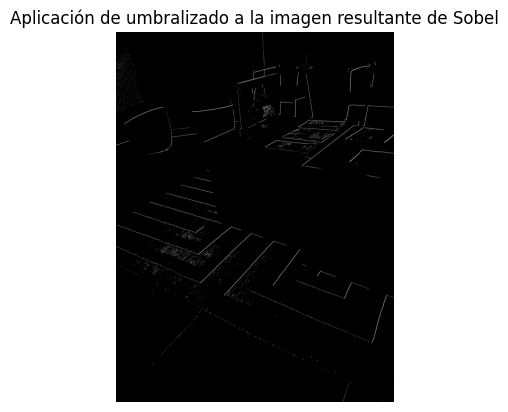

In [101]:
# Con sobel aplicar antes un umbralizado
# Marcar que columna y que fila tienen los máximos y ver la diferencia entre canny y sobel
# Gaussiana para suavizar la imagen original
gaussian_blurred_gray_img = cv2.GaussianBlur(gray_dentist_waiting_room, (3, 3), 0)

# Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(gaussian_blurred_gray_img, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(gaussian_blurred_gray_img, cv2.CV_64F, 0, 1)  # y
# Combina ambos resultados
# Imagen resultante de Sobel
sobel_applied_dentist_waiting_room = cv2.add(sobelx, sobely)

plt.title("Imagen resultante de Sobel")
plt.axis("off")
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel_applied_dentist_waiting_room), cmap='gray')
plt.show()

# Aplicacion del umbralizado
threshold = 127
res, threshold_sobel_dentist_waiting_room = cv2.threshold(sobel_applied_dentist_waiting_room, threshold, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.title("Aplicación de umbralizado a la imagen resultante de Sobel")
plt.axis("off")
plt.imshow(threshold_sobel_dentist_waiting_room, cmap='gray') #Visualiza con mapa de color gris
plt.show()

### Aplicación de umbralizado a la imagen resultante de Canny

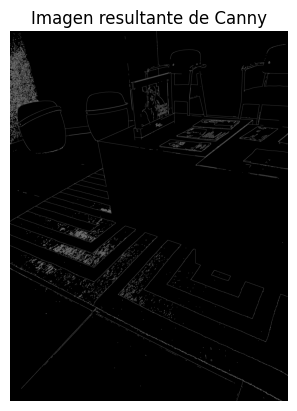

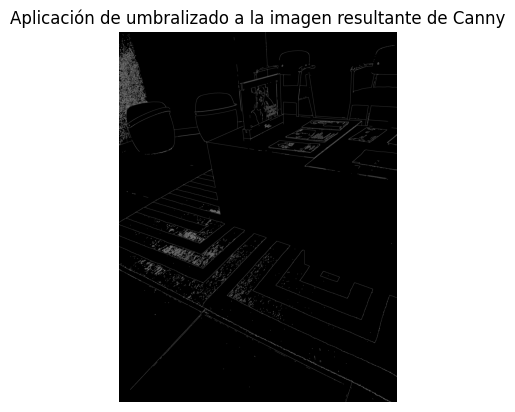

In [148]:
#Obtiene contornos con el operador de Canny
canny_applied_dentist_waiting_room = cv2.Canny(gray_dentist_waiting_room, 100, 200)
#Muestra resultado
plt.title("Imagen resultante de Canny")
plt.axis("off")
plt.imshow(canny_applied_dentist_waiting_room, cmap='gray') 
plt.show()

res, threshold_canny_dentist_waiting_room = cv2.threshold(canny_applied_dentist_waiting_room, threshold, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.title("Aplicación de umbralizado a la imagen resultante de Canny")
plt.axis("off")
plt.imshow(threshold_canny_dentist_waiting_room, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Se observa como no hay diferencia porque la salida de Canny ya está, de hecho, doblemente umbralizada.
https://en.wikipedia.org/wiki/Canny_edge_detector#Double_threshold

Igualmente, se hace la prueba y se muestra con código.

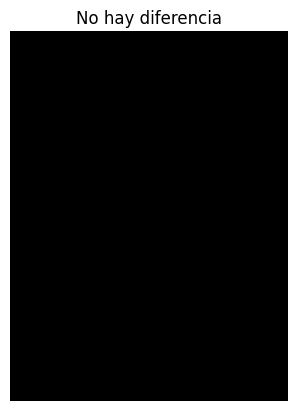

In [152]:
dif = cv2.absdiff(canny_applied_dentist_waiting_room, threshold_canny_dentist_waiting_room)
plt.title("No hay diferencia")
plt.axis("off")
plt.imshow(dif, cmap='gray')
plt.show()

### Conteo por filas y columnas

#### Conteo por columnas

In [103]:
# Primero pasamos a enteros
threshold_sobel_dentist_waiting_room = cv2.convertScaleAbs(threshold_sobel_dentist_waiting_room)

(0.0, 3024.0)

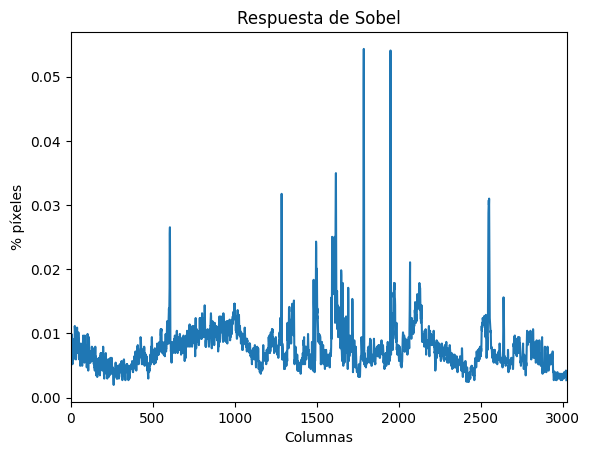

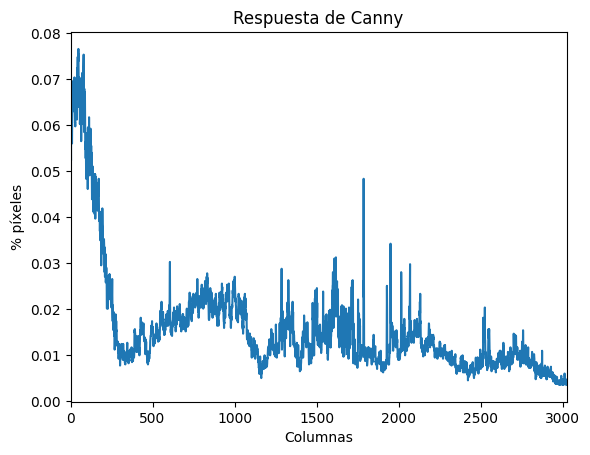

In [104]:
# Si muestras el contenido de la imagen resultado, son valores 0 o 255
# Cuenta el número de píxeles blancos (255) por columna
# Suma los valores de los pixeles por columna

col_counts_sobel = cv2.reduce(threshold_sobel_dentist_waiting_room, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts_canny = cv2.reduce(threshold_canny_dentist_waiting_room, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de filas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por columna
cols_sobel = col_counts_sobel[0] / (255 * threshold_sobel_dentist_waiting_room.shape[0])
cols_canny = col_counts_canny[0] / (255 * threshold_canny_dentist_waiting_room.shape[0])
#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_sobel)
plt.xlim([0, gray_dentist_waiting_room.shape[1]])

plt.figure()
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_canny)
plt.xlim([0, gray_dentist_waiting_room.shape[1]])

#### Conteo por filas

(0.0, 3024.0)

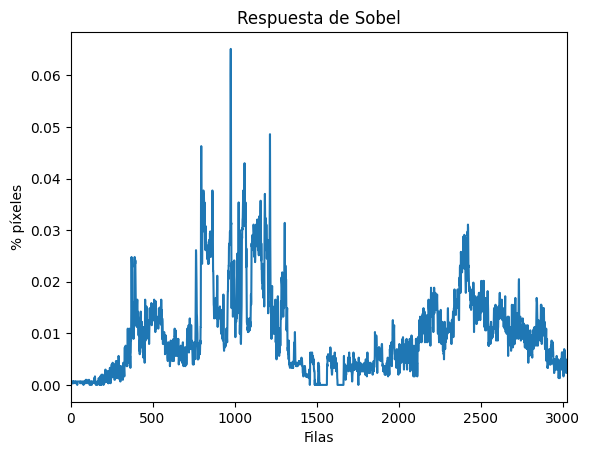

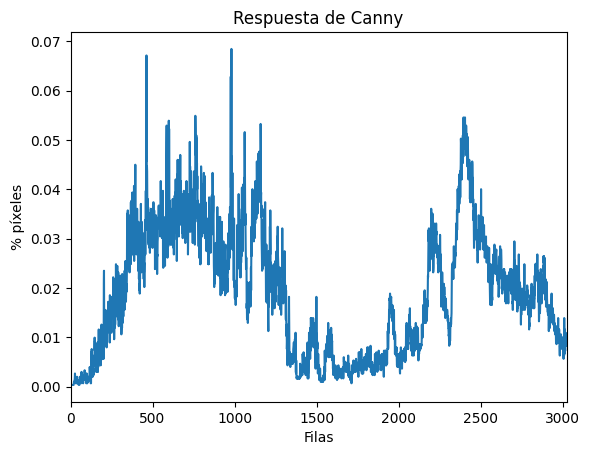

In [105]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts_sobel = cv2.reduce(threshold_sobel_dentist_waiting_room, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts_canny = cv2.reduce(threshold_canny_dentist_waiting_room, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Se hace la transpuesta para trabajar con una lista de valores y no una lista de listas con un valor
# [[0],[1]] -> [0,1]
row_counts_sobel = row_counts_sobel.transpose()
row_counts_canny = row_counts_canny.transpose()

#Normaliza en base al número de columnas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows_sobel = row_counts_sobel[0] / (255 * threshold_sobel_dentist_waiting_room.shape[1])
rows_canny = row_counts_canny[0] / (255 * threshold_canny_dentist_waiting_room.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_sobel)
plt.xlim([0, gray_dentist_waiting_room.shape[1]])

plt.figure()
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_canny)
plt.xlim([0, gray_dentist_waiting_room.shape[1]])

#### Conclusiones y visualización de resultados

##### Resultados para Sobel

In [106]:
# Máximo por columnas
col_max_sobel = np.where(cols_sobel == np.amax(cols_sobel))
print("Columnas con el máximo número de pixeles blancos: ", col_max_sobel[0])

# Máximo por filas
row_max_sobel = np.where(rows_sobel == np.amax(rows_sobel))
print("Filas con el máximo número de pixeles blancos:", row_max_sobel[0])

# Columnas con un alto número de pixeles blancos
cols_max_sobel = np.where(cols_sobel >= 0.95*np.amax(cols_sobel))
print("Columnas con un número de pixeles blancos que superan el 0.95*maximo: ", cols_max_sobel[0])

# Filas con un alto número de pixeles blancos
rows_max_sobel = np.where(rows_sobel >= 0.95*np.amax(rows_sobel))
print("Filas con un número de pixeles blancos que superan el 0.95*maximo: ", rows_max_sobel[0])

Columnas con el máximo número de pixeles blancos:  [1788]
Filas con el máximo número de pixeles blancos: [977]
Columnas con un número de pixeles blancos que superan el 0.95*maximo:  [1788 1951]
Filas con un número de pixeles blancos que superan el 0.95*maximo:  [977]


##### Resultados para Canny

In [107]:
# Máximo por columnas
col_max_canny = np.where(cols_canny == np.amax(cols_canny))
print("Columnas con el máximo número de pixeles blancos: ", col_max_canny[0])

# Máximo por filas
row_max_canny = np.where(rows_canny == np.amax(rows_canny))
print("Filas con el máximo número de pixeles blancos:", row_max_canny[0])

# Columnas con un alto número de pixeles blancos
cols_max_canny = np.where(cols_canny >= 0.95*np.amax(cols_canny))
print("Columnas con un número de pixeles blancos que superan el 0.95*maximo: ", cols_max_canny[0])

# Filas con un alto número de pixeles blancos
rows_max_canny = np.where(rows_canny >= 0.95*np.amax(rows_canny))
print("Filas con un número de pixeles blancos que superan el 0.95*maximo: ", rows_max_canny[0])

Columnas con el máximo número de pixeles blancos:  [48]
Filas con el máximo número de pixeles blancos: [981]
Columnas con un número de pixeles blancos que superan el 0.95*maximo:  [44 46 47 48 79 80]
Filas con un número de pixeles blancos que superan el 0.95*maximo:  [463 981]


##### Visualización de resultados

In [108]:
def getIntervals(list_with_integers):
    """
    Esta función tiene por objetivo la extracción de intervalos dado una lista de valores.
    El motivo se debe a que como se observa en la salida de la celda superior, hay una serie de columnas con valores
    contiguos.
    Para recalcar las filas y columnas como se ve en las funciones definidas abajo, lo que se hace es pintar una linea
    antes y despues de la fila o culumnas, es decir, para las filas, una linea ligeramente mas arriba y otra mas abajo,
    y para las columnas una linea a la izquierda y otra a la derecha.
    Por lo tanto, para evitar que una de estas lineas solapen a las columnas o filas que se quieran recalcar (en caso de que el 
    intervalo sea muy grande), pues simplemente se detecta el intervalo y se recalca este como si fuera una unica fila o culumna
    dibujando una linea ariba o izquierda, y abajo o derecha del primer y último elemento del intervalo respectivamente.
    """
    intervals = [[list_with_integers[0]]]
    prev = list_with_integers[0]
    for i in range (1, len(list_with_integers)):
        current = list_with_integers[i]
        if current == prev + 1:
            for interval in intervals:
                if prev in interval:
                    interval.append(current)
                    break
        else:
            intervals.append([current])
        prev = current
    return intervals

In [109]:
def drawColumns(intervals, img, offset=40, line_width=10, color=255):
    """
    Esta funcion pinta lineas vertivales a una distancia de la columnas que se quieran resaltar.
    Para ello, dado una lista de intervalos seleccionados, se toma el primer valor del intervalo
    y dibuja una linea a la izquierda dado un desplazamiento; a continuacion, se toma el 
    ultimo valor del intervalo y se dibuja una linea a la derecha tambien usando el mismo desplazamiento
    """
    top = 0
    bottom = img.shape[0]
    cv2.line(img, (intervals[0][0]-offset, top), (intervals[0][0]-offset, bottom), color, line_width)
    end_of_prev_interval = intervals[0][-1]
    for i in range(1, len(intervals) - 1):
        start_of_interval = intervals[i][0]
        end_of_interval = intervals[i][-1]
        if start_of_interval - end_of_prev_interval > 20:
            cv2.line(img, (start_of_interval-offset, top), (start_of_interval-offset, bottom), color, line_width)
        else:
            cv2.line(img, (start_of_interval-1, top), (start_of_interval-1, bottom), color, 1)
    
    cv2.line(img, (intervals[-1][-1]+offset, top), (intervals[-1][-1]+offset, bottom), color, line_width)

In [110]:
def drawRows(intervals, img):
    """
    Esta funcion pinta lineas horizontales a una distancia de la columnas que se quieran resaltar.
    Para ello, dado una lista de intervalos seleccionados, se toma el primer valor del intervalo
    y dibuja una linea horizontal por arriba dado un desplazamiento; a continuacion, se toma el 
    ultimo valor del intervalo y se dibuja una linea abajo tambien usando el mismo desplazamiento
    """
    start = 0
    end = img.shape[1]
    offset = 40
    line_width = 10
    cv2.line(img, (start, intervals[0][0]-offset), (end, intervals[0][0]-offset), 255, line_width)
    end_of_prev_interval = intervals[0][-1]
    for i in range(1, len(intervals) - 1):
        start_of_interval = intervals[i][0]
        end_of_interval = intervals[i][-1]
        if start_of_interval - end_of_prev_interval > 20:
            cv2.line(img, (start, start_of_interval-offset), (end, start_of_interval-offset), 255, line_width)
        else:
            cv2.line(img, (start, start_of_interval-1), (end, start_of_interval-1), 255, 1)
    
    cv2.line(img, (start, intervals[-1][-1]+offset), (end, intervals[-1][-1]+offset), 255, line_width)

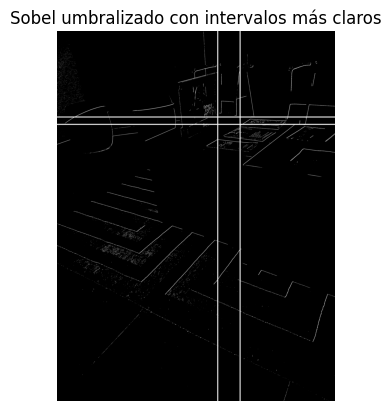

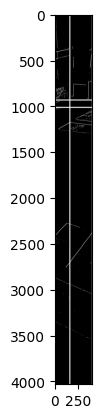

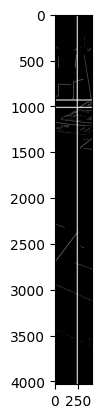

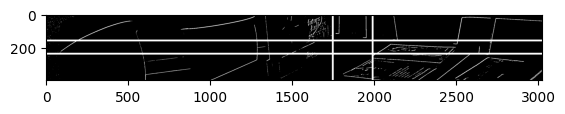

In [111]:
threshold_sobel = threshold_sobel_dentist_waiting_room.copy()
intervals_cols_sobel = getIntervals(cols_max_sobel[0])
intervals_rows_sobel = getIntervals(rows_max_sobel[0])

drawColumns(intervals_cols_sobel, threshold_sobel)
drawRows(intervals_rows_sobel, threshold_sobel)

plt.axis("off")
plt.title("Sobel umbralizado con intervalos más claros")
plt.imshow(threshold_sobel, cmap="gray") #Visualiza con mapa de color gris
plt.show()

# Se muestran los intervalos verticales resaltados más de cerca, cortando el resto de la imagen
for interval in intervals_cols_sobel:
    offset = 200
    if  interval[0] > offset: crop_x0 = interval[0] - offset; 
    else: crop_x0 = 0
    if  interval[-1] + offset > threshold_sobel.shape[0]:crop_x1 = 0
    else: crop_x1 = interval[-1] + offset
    plt.imshow(threshold_sobel[:, crop_x0:crop_x1], cmap="gray") #Visualiza con mapa de color gris
    plt.show()

# Se muestran los intervalos horizontales resaltados más de cerca, cortando el resto de la imagen
for interval in intervals_rows_sobel:
    offset = 200
    if  interval[0] > offset: crop_y0 = interval[0] - offset; 
    else: crop_y0 = 0
    if  interval[-1] + offset > threshold_sobel.shape[0]:crop_y1 = 0
    else: crop_y1 = interval[-1] + offset
    plt.imshow(threshold_sobel[crop_y0:crop_y1, :], cmap="gray") #Visualiza con mapa de color gris
    plt.show()

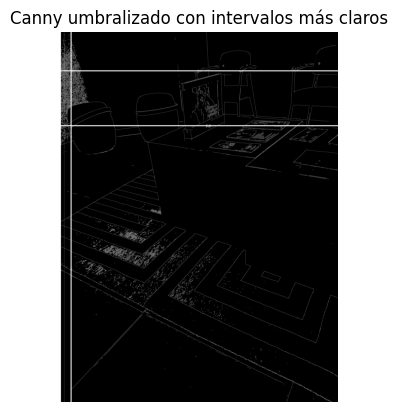

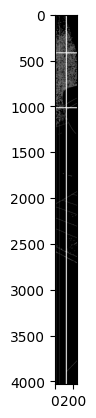

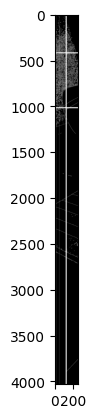

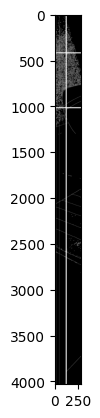

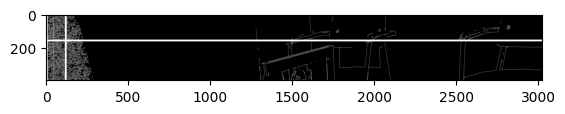

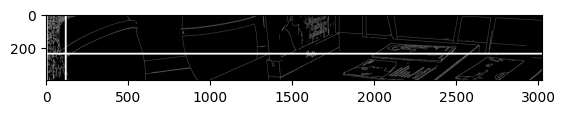

In [112]:
threshold_canny = threshold_canny_dentist_waiting_room.copy()
intervals_cols_canny = getIntervals(cols_max_canny[0])
intervals_rows_canny = getIntervals(rows_max_canny[0])

drawColumns(intervals_cols_canny, threshold_canny)
drawRows(intervals_rows_canny, threshold_canny)

plt.title("Canny umbralizado con intervalos más claros")
plt.axis("off")
plt.imshow(threshold_canny, cmap="gray") #Visualiza con mapa de color gris
plt.show()

for interval in intervals_cols_canny:
    offset = 200
    if  interval[0] > offset: crop_x0 = interval[0] - offset; 
    else: crop_x0 = 0
    if  interval[-1] + offset > threshold_canny.shape[0]:crop_x1 = 0
    else: crop_x1 = interval[-1] + offset
    plt.imshow(threshold_canny[:, crop_x0:crop_x1], cmap="gray") #Visualiza con mapa de color gris
    plt.show()

for interval in intervals_rows_canny:
    offset = 200
    if  interval[0] > offset: crop_y0 = interval[0] - offset; 
    else: crop_y0 = 0
    if  interval[-1] + offset > threshold_canny.shape[0]:crop_y1 = 0
    else: crop_y1 = interval[-1] + offset
    plt.imshow(threshold_canny[crop_y0:crop_y1, :], cmap="gray") #Visualiza con mapa de color gris
    plt.show()

##### Comparación de resultados

Aunque en la filas para este caso los resultados son similares, en el caso de las columnas se observa una mayor diferencia. Esto se debe a que los claros tras haber aplicado sobel caían por debajo del umbral establecido de 127.
El ejemplo más claro es la pared de la parte izquierda de la imagen, que, al umbralizar el resultado de haber aplicado Sobel desaparece completamente, mientras que con Canny se conserva. De hecho, es esta porción de la imagen la que marca la diferencia, puesto que las columnas con mayor cantidad de píxeles blancos se encuentran aquí.

Se hace uso de la sección posterior para hacer una comparación entre las dos imagenes. Se observa, entre otras, como la pared de la izquierda es una de las diferencias.

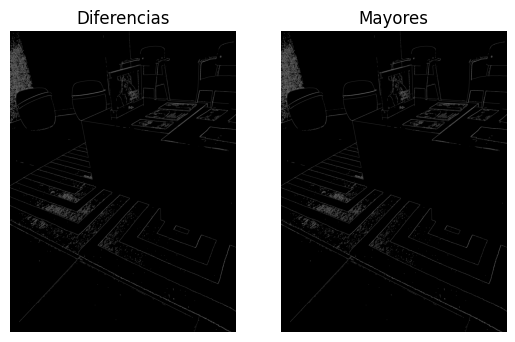

In [113]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana
dif_sobel_canny_dentist = cv2.absdiff(threshold_canny_dentist_waiting_room, cv2.convertScaleAbs(threshold_sobel_dentist_waiting_room))
#dif_sobel_canny_dentist = cv2.absdiff(threshold_canny, threshold_sobel)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif_sobel_canny_dentist, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif_sobel_canny_dentist = cv2.threshold(dif_sobel_canny_dentist, 50, 200, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif_sobel_canny_dentist, cmap='gray') 
plt.show()


## TAREA: Igual que la anterior, pero ante la duda de usar la imagen nueva o la del mandril, se vuelve a hacer lo mismo con la del mandril

Histograma de la imagen del mandril.

(0.0, 256.0)

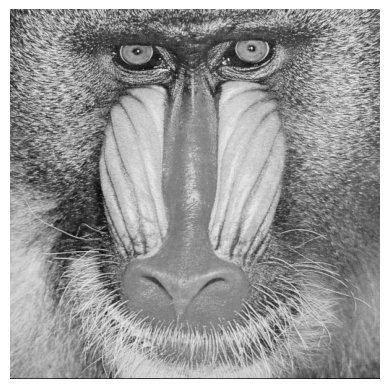

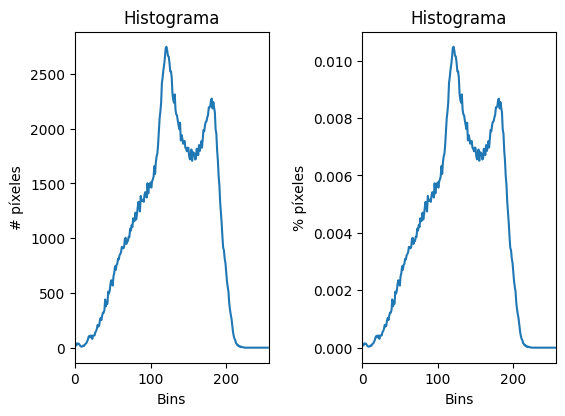

In [114]:
#Lee imagen de archivo
mandril = cv2.imread('mandril.jpg')
#Conversión a grises de la original en BGR
mandril_en_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])


Se tomará como valor umbral el 100, justo antes de la primera cresta

### Aplicación de umbralizado a la imagen resultante de sobel

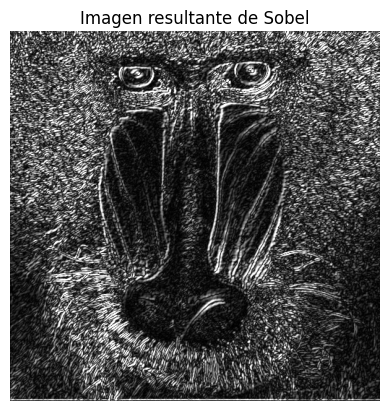

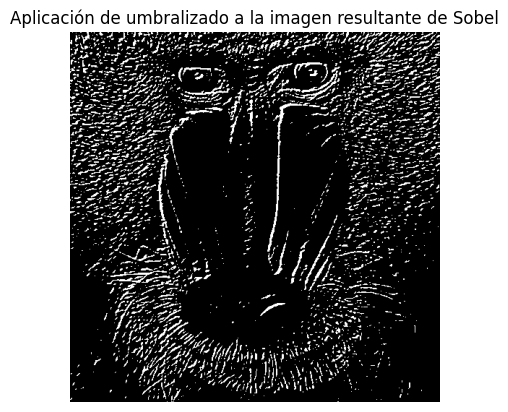

In [115]:
# Con sobel aplicar antes un umbralizado
# Marcar que columna y que fila tienen los máximos y ver la diferencia entre canny y sobel
# Gaussiana para suavizar la imagen original
gaussian_mandril = cv2.GaussianBlur(mandril_en_grises, (3, 3), 0)

# Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(gaussian_mandril, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(gaussian_mandril, cv2.CV_64F, 0, 1)  # y
# Combina ambos resultados
# Imagen resultante de Sobel
mandril_sobel = cv2.add(sobelx, sobely)

plt.title("Imagen resultante de Sobel")
plt.axis("off")
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(mandril_sobel), cmap='gray')
plt.show()

# Aplicacion del umbralizado
threshold = 100
res, threshold_applied_to_mandril_sobel = cv2.threshold(mandril_sobel, threshold, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.title("Aplicación de umbralizado a la imagen resultante de Sobel")
plt.axis("off")
plt.imshow(threshold_applied_to_mandril_sobel, cmap='gray') #Visualiza con mapa de color gris
plt.show()

### Aplicación de umbralizado a la imagen resultante de Canny

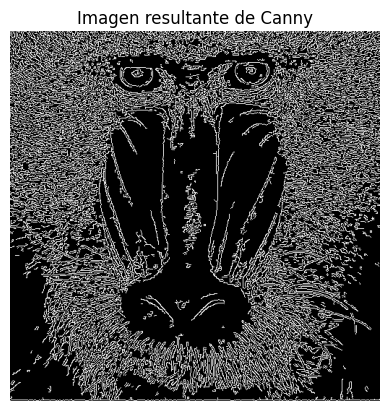

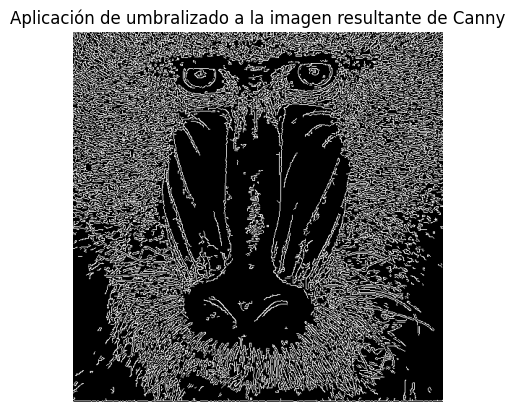

In [116]:
#Obtiene contornos con el operador de Canny
canny_mandril = cv2.Canny(mandril_en_grises, 100, 200)
#Muestra resultado
plt.title("Imagen resultante de Canny")
plt.axis("off")
plt.imshow(canny_mandril, cmap='gray') 
plt.show()

res, threshold_applied_to_mandril_canny= cv2.threshold(canny_mandril, threshold, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.title("Aplicación de umbralizado a la imagen resultante de Canny")
plt.axis("off")
plt.imshow(threshold_applied_to_mandril_canny, cmap='gray') #Visualiza con mapa de color gris
plt.show()

### Conteo por filas y columnas

#### Conteo por culumnas

In [117]:
# Primero pasamos a enteros
threshold_applied_to_mandril_sobel = cv2.convertScaleAbs(threshold_applied_to_mandril_sobel)

(0.0, 512.0)

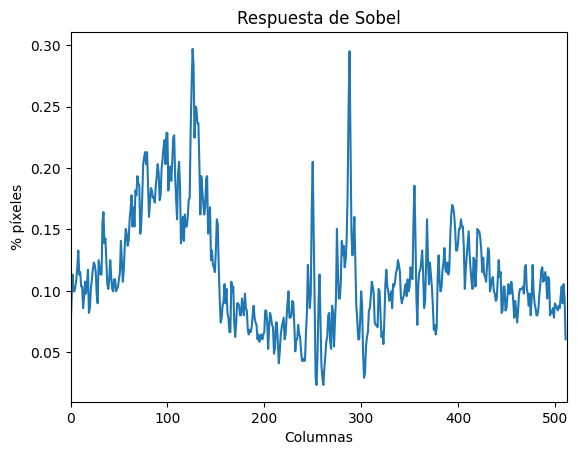

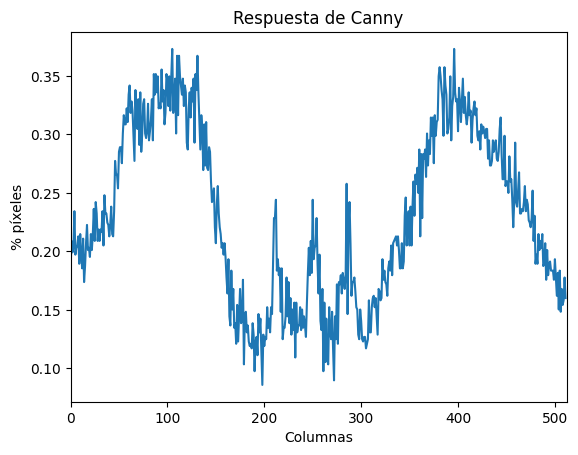

In [118]:
# Si muestras el contenido de la imagen resultado, son valores 0 o 255
# Cuenta el número de píxeles blancos (255) por columna
# Suma los valores de los pixeles por columna

col_counts_sobel = cv2.reduce(threshold_applied_to_mandril_sobel, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts_canny = cv2.reduce(threshold_applied_to_mandril_canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de filas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por columna
cols_sobel = col_counts_sobel[0] / (255 * threshold_applied_to_mandril_sobel.shape[0])
cols_canny = col_counts_canny[0] / (255 * threshold_applied_to_mandril_canny.shape[0])
#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_sobel)
plt.xlim([0, mandril_en_grises.shape[1]])

plt.figure()
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_canny)
plt.xlim([0, mandril_en_grises.shape[1]])

#### Conteo por filas

(0.0, 512.0)

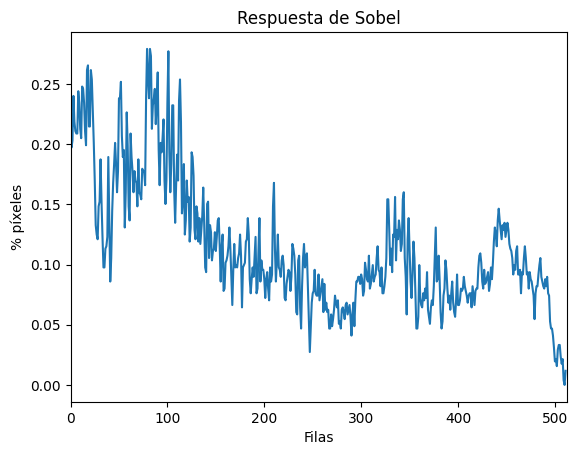

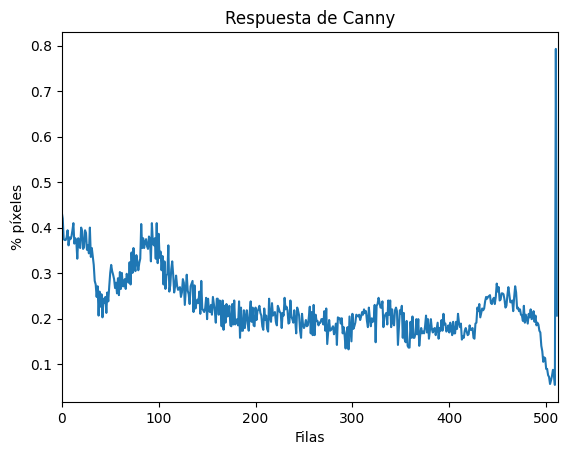

In [119]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts_sobel = cv2.reduce(threshold_applied_to_mandril_sobel, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts_canny = cv2.reduce(threshold_applied_to_mandril_canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Se hace la transpuesta para trabajar con una lista de valores y no una lista de listas con un valor
# [[0],[1]] -> [0,1]
row_counts_sobel = row_counts_sobel.transpose()
row_counts_canny = row_counts_canny.transpose()

#Normaliza en base al número de columnas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows_sobel = row_counts_sobel[0] / (255 * threshold_applied_to_mandril_sobel.shape[1])
rows_canny = row_counts_canny[0] / (255 * threshold_applied_to_mandril_canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_sobel)
plt.xlim([0, mandril_en_grises.shape[1]])

plt.figure()
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_canny)
plt.xlim([0, mandril_en_grises.shape[1]])

### Conclusiones y visualización de resultados

#### Resultados para Sobel

In [120]:
# Máximo por columnas
col_max_sobel = np.where(cols_sobel == np.amax(cols_sobel))
print("Columnas con el máximo número de pixeles blancos: ", col_max_sobel[0])

# Máximo por filas
row_max_sobel = np.where(rows_sobel == np.amax(rows_sobel))
print("Filas con el máximo número de pixeles blancos:", row_max_sobel[0])

# Columnas con un alto número de pixeles blancos
cols_max_sobel = np.where(cols_sobel >= 0.95*np.amax(cols_sobel))
print("Columnas con un número de pixeles blancos que superan el 0.95*maximo: ", cols_max_sobel[0])

# Filas con un alto número de pixeles blancos
rows_max_sobel = np.where(rows_sobel >= 0.95*np.amax(rows_sobel))
print("Filas con un número de pixeles blancos que superan el 0.95*maximo: ", rows_max_sobel[0])

Columnas con el máximo número de pixeles blancos:  [126]
Filas con el máximo número de pixeles blancos: [79 82]
Columnas con un número de pixeles blancos que superan el 0.95*maximo:  [126 127 288]
Filas con un número de pixeles blancos que superan el 0.95*maximo:  [ 18  79  82  83 101]


#### Resultados para Canny

In [121]:
# Máximo por columnas
col_max_canny = np.where(cols_canny == np.amax(cols_canny))
print("Columnas con el máximo número de pixeles blancos: ", col_max_canny[0])

# Máximo por filas
row_max_canny = np.where(rows_canny[0:510] == np.amax(rows_canny[0:510]))
print("Filas con el máximo número de pixeles blancos:", row_max_canny[0])

# Columnas con un alto número de pixeles blancos
cols_max_canny = np.where(cols_canny >= 0.95*np.amax(cols_canny))
print("Columnas con un número de pixeles blancos que superan el 0.95*maximo: ", cols_max_canny[0])

# Filas con un alto número de pixeles blancos
rows_max_canny = np.where(rows_canny[0:510] >= 0.95*np.amax(rows_canny[0:510]))
print("Filas con un número de pixeles blancos que superan el 0.95*maximo: ", rows_max_canny[0])

Columnas con el máximo número de pixeles blancos:  [105 396]
Filas con el máximo número de pixeles blancos: [0]
Columnas con un número de pixeles blancos que superan el 0.95*maximo:  [ 94 105 110 112 131 381 386 396]
Filas con un número de pixeles blancos que superan el 0.95*maximo:  [0 1]


#### Visualización de resultados

In [122]:
def draw_cols(frame, cols):
    """
    Funcion que dibuja sobre las columnas de la imagen los bordes detectados y seleccionados.
    """
    bottom = frame.shape[0]
    for col in cols[0]:
        cv2.line(frame, (col, 0), (col, bottom), (255,255,255), 4)
    return frame

In [123]:
def draw_rows(frame, rows):
    """
    Funcion que dibuja sobre las filas de la imagen los bordes detectados y seleccionados.
    """
    end = frame.shape[1]
    for row in rows[0]:
        cv2.line(frame, (0, row), (end, row), (255,255,255), 4)
    return frame

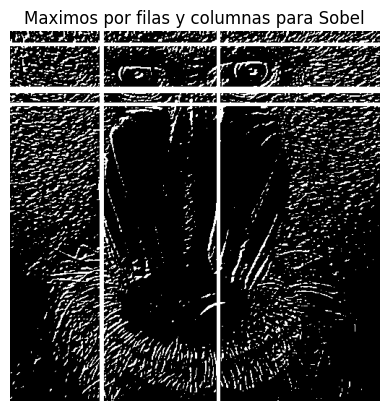

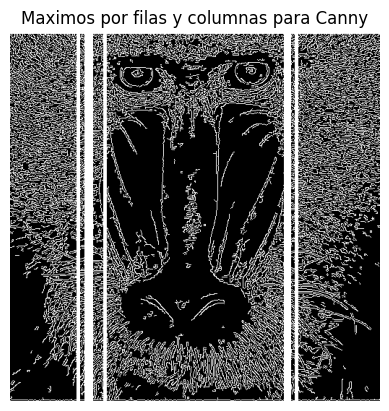

In [124]:
sobel_result = threshold_applied_to_mandril_sobel.copy()
canny_result = threshold_applied_to_mandril_canny.copy()

sobel_result = draw_rows(sobel_result, rows_max_sobel)
sobel_result = draw_cols(sobel_result, cols_max_sobel)

canny_result = draw_rows(canny_result, rows_max_canny)
canny_result = draw_cols(canny_result, cols_max_canny)

plt.axis("off")
plt.title("Maximos por filas y columnas para Sobel")
plt.imshow(sobel_result, cmap="gray") #Visualiza con mapa de color gris
plt.show()

plt.axis("off")
plt.title("Maximos por filas y columnas para Canny")
plt.imshow(canny_result, cmap="gray") #Visualiza con mapa de color gris
plt.show()

Nota: En la imagen resultante de Canny las filas marcadas son la 0 y la 1.

#### Comparación de resultados

Para esta imagen, los resultados no son tan similares.
La única similitud que se puede mencionar es la detección de bordes verticales a la izquierda del morro.

Las diferencias son obserbables a simple vista, la imagen resultante de haber aplicado Canny ha detectado muchos más bordes.

A continuación, se muestra la diferencia entre la imagen resultate de Sobel umbralizada y la imagen resultante de Canny. Se observa como dicha diferencia es prácticamente la imagen resultante de Canny, puesto que ésta tiene mucho más blanco.

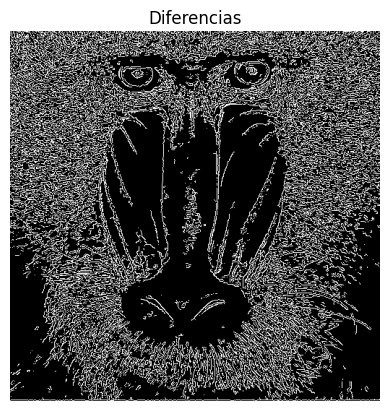

In [125]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana
dif_mandril = cv2.absdiff(threshold_applied_to_mandril_sobel, threshold_applied_to_mandril_canny)

#Visualiza
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif_mandril, cmap='gray') 


## TAREA: Componer un repertorio de habilidades (alternando entre ellas con eventos de ratón o teclado) combinando las funciones vistas hasta este momento aplicadas sobre la entrada de la webcam.

Se propone un repertorio de habilidades en el que se muestran los siguientes efectos:
- Pixel más claro / oscuro
- Pop art
- Detector de movimiento tomando un fondo "cada x tiempo" y viendo diferencias con ese fotograma
- Detector de movimiento mostrando la diferencia con la imagen anterior
- Muestreo de bordes verticales usando la diferencia entre el fotograma actual y el anterior
- Muestreo de bordes verticales en la imagen capturada
- Muestreo de bordes horizontales en la imagen capturada
- Muestreo de bordes verticales y horizontales en la imagen capturada
- Muestreo de la salida del Canny aplicado al fotograma actual
- El fotograma umbralizado
- Canny umbralizado

Uso:
- Flecha derecha para avanzar
- Fecha izquierda para retroceder
- Escape para salir

In [126]:
def getAndDrawCols(frame):
    try:
        # Se pasa a grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Se aplica canny
        canny_frame = cv2.Canny(gray_frame, 100, 200)
        # Se umbraliza canny
        res, threshold_canny_frame = cv2.threshold(canny_frame, 127, 255, cv2.THRESH_BINARY)
        # Suma los valores de los pixeles por columna
        col_counts_frame = cv2.reduce(threshold_canny_frame, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
        # Se normaliza en base al número de filas y valor maximo del pixel
        cols_frame = col_counts_frame[0] / (255 * threshold_canny_frame.shape[0])
        # Obtiene aquellas columnas con mas pixeles blancos 
        cols_max_frame = np.where(cols_frame >= 0.85*np.amax(cols_frame))
        # Se pintan las columnas en blanco
        bottom = frame.shape[0]
        if len(cols_max_frame[0]) < frame.shape[1] * 2/3:
            for col in cols_max_frame[0]:
                cv2.line(frame, (col, 0), (col, bottom), (255,255,255), 4)
    except Exception as e:
        print(e)
    return frame

In [127]:
def getAndDrawRows(frame):
    try:
        # Se pasa a grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Se aplica canny
        canny_frame = cv2.Canny(gray_frame, 100, 200)
        # Se umbraliza canny
        res, threshold_canny_frame = cv2.threshold(canny_frame, 127, 255, cv2.THRESH_BINARY)
        # Suma los valores de los pixeles por fila
        row_counts_frame = cv2.reduce(threshold_canny_frame, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
        # Se hace la transpuesta para tener una lista de valores, no una lista de listas de valores
        row_counts_frame = row_counts_frame.transpose()
        # Se normaliza en base al número de columnas y valor maximo del pixel
        rows_frame = row_counts_frame[0] / (255 * threshold_canny_frame.shape[1])
        # Filas con mayor numero de pixeles blancos
        rows_max_frame = np.where(rows_frame >= 0.85*np.amax(rows_frame))
        # Se pintan las filas en blanco
        end = frame.shape[1]
        if len(rows_max_frame[0]) < frame.shape[0] * 2/3:
            for row in rows_max_frame[0]:
                cv2.line(frame, (0, row), (end, row), (255,255,255), 4)
    except Exception as e:
        print(e)
    return frame

In [128]:
def pop_art(frame):
    ncells = 8
    #Dimensiones originales
    h, w, c = frame.shape

    # Creamos imagen negra
    pop_art = np.zeros((h,w,3), dtype = np.uint8)

    for y in range(0,h,ncells):
        for x in range(0,w,ncells):
            r = frame[y,x,0]
            g = frame[y,x,1]
            b = frame[y,x,2]
            if r > g and r > b:
                cv2.ellipse(pop_art, (x+int(ncells/2), y+int(ncells/2)), (int(ncells-1), int(ncells/2)), 135, 0, 180, (int(r), int(g/1.3), int(b/1.3)), -1)
            else:
                cv2.ellipse(pop_art, (x+int(ncells/2), y+int(ncells/2)), (int(ncells-1), int(ncells/2)), 45, 0, 180, (int(r/1.3), int(g), int(b)), -1)

    # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
    cv2.imshow('Cam', pop_art)

In [129]:
def zona_clara_oscura(frame):
    # Se pasa la image a grises
    grayimg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Se sacan los indices de los pixeles claros y oscuros
    max = np.where(grayimg == np.amax(grayimg))
    min = np.where(grayimg == np.amin(grayimg))

    # Se asignan a variables. Se coge el primero y como funciona relativamente bien...
    dx, dy, bx, by = min[1][0], min[0][0], max[1][0], max[0][0]

    # Pintan los circulos; Circulo verde para el px oscuro y circulo rojo para el claro
    cv2.circle(frame, (dx, dy), 5, (0,255,0), 2)
    cv2.circle(frame, (bx, by), 5, (0,0,255), 2)
    
    # Lo mismo para reflejar el resultado en la imagen de grises
    cv2.circle(grayimg, (dx, dy), 5, (255), 2)
    cv2.circle(grayimg, (bx, by), 5, (0), 2)
    
    cv2.imshow('Cam', frame)

In [130]:
def eliminador_fondo(frame, backSub):
    fgMask = backSub.apply(frame)
    cv2.imshow('Cam', fgMask)

In [131]:
def diferencia(frame, prevFrame):
    dif = cv2.absdiff(frame, prevFrame)
    cv2.imshow('Cam', dif)

In [132]:
def diferencia_con_bordes_verticales(frame, prevFrame):
    dif = cv2.absdiff(frame, prevFrame)
    dif = getAndDrawCols(dif)    
    cv2.imshow('Cam', dif)

In [133]:
def bordes_verticales(frame):
    frame = getAndDrawCols(frame)
    cv2.imshow('Cam', frame)

In [134]:
def bordes_horizontales(frame):
    frame = getAndDrawRows(frame)
    cv2.imshow('Cam', frame)

In [135]:
def bordes_verticales_y_horizontales(frame):
    frame = getAndDrawCols(frame)
    frame = getAndDrawRows(frame)
    cv2.imshow('Cam', frame)

In [136]:
def canny_output(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canny_frame = cv2.Canny(gray_frame, 100, 200)
    cv2.imshow('Cam', canny_frame)


In [137]:
def umbralizado(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    res, output = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)
    cv2.imshow('Cam', output)

In [138]:
def canny_y_umbralizado(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canny_frame = cv2.Canny(gray_frame, 100, 200)
    res, threshold_canny_frame = cv2.threshold(canny_frame, 127, 255, cv2.THRESH_BINARY)
    cv2.imshow('Cam', threshold_canny_frame)

In [139]:
def switch(effect, frame, backSub, prevFrame):
    if effect == 0:
        zona_clara_oscura(frame)
    elif effect == 1:
        pop_art(frame)
    elif effect == 2:
        eliminador_fondo(frame, backSub)
    elif effect == 3:
        diferencia(frame, prevFrame)
    elif effect == 4:
        diferencia_con_bordes_verticales(frame, prevFrame)
    elif effect == 5:
        bordes_verticales(frame)
    elif effect == 6:
        bordes_horizontales(frame)
    elif effect == 7:
        bordes_verticales_y_horizontales(frame)
    elif effect == 8:
        canny_output(frame)
    elif effect == 9:
        umbralizado(frame)
    elif effect == 10:
        canny_y_umbralizado(frame)

In [140]:
vid = cv2.VideoCapture(0)
backSub = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
effect = 0
number_of_effects = 10
prevFrame = 0

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)
        switch(effect, framem, backSub, prevFrame)
        prevFrame = framem
   
    # Uso de teclas del teclado
    key = cv2.waitKey(33)
    # ESC para salir
    if key == 27:
        break
    # Flecha izquierda para mostrar el siguiente efecto
    elif key == 39:
        effect += 1
        if effect > number_of_effects: effect = 0
    # Flecha derecha para mostrar el efecto anterior
    elif key == 37:
        effect -= 1
        if effect < 0: effect = number_of_effects
    else:
        continue
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## TAREA: Ver el vídeo de My little piece of privacy, proponer una reinterpretación.

La idea es que se detectan los bordes verticales y se asume que son los límites de la cabeza o cuerpo (si está de pie y relativamente lejos de la camara) de una persona. Se pintan unos rectángulos negros que cubren el resto de la imagen a la derecha e izquierda de la "persona" detectada para que de la sensación de que la está siguiendo, como la cortina del vídeo.

Adicionalmente, se presentan dos versiones, en ambas se pinta sobre el fotograma sobre el que se está capturando, en la que aparece inicialmente se detectan los bordes verticales de este fotograma sin procesar, en la segunda, la detección de bordes verticales se hace con la diferencia entre el fotograma actual y el anterior. Se observa como el segundo enfoque muestra un mejor resultado.


Uso:
- Flechas izquierda y derecha para cambiar de vista.
- Tecla "t" para mostrar o dejar de mostrar los bordes verticales detectados
- Escape para salir

In [141]:
def getCols(frame):
    # Se pasa a grises
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Se aplica canny
    canny_frame = cv2.Canny(gray_frame, 100, 200)
    # Se umbraliza canny
    res, threshold_canny_frame = cv2.threshold(canny_frame, 127, 255, cv2.THRESH_BINARY)
    # Suma los valores de los pixeles por columna
    col_counts_frame = cv2.reduce(threshold_canny_frame, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    # Se normaliza en base al número de filas y valor maximo del pixel
    cols_frame = col_counts_frame[0] / (255 * threshold_canny_frame.shape[0])
    # Obtiene aquellas columnas con mas pixeles blancos 
    cols_max_frame = np.where(cols_frame >= 0.90*np.amax(cols_frame))
    # Se devuelven las columnas
    return cols_max_frame

In [142]:
def draw_cols(frame, cols):
    """
    Funcion que dibuja sobre las columnas de la imagen los bordes detectados y seleccionados.
    """
    bottom = frame.shape[0]
    if len(cols[0]) < frame.shape[1] * 2/3:
        for col in cols[0]:
            cv2.line(frame, (col, 0), (col, bottom), (255,255,255), 4)
    return frame

In [143]:
def draw_black_rectangles(frame, cols):
    """
    Funcion que dibuja un rectangulo negro a la izquierda del primer borde vertical seleccionado y 
    otro rectangulo negro a la derecha del ultimo borde vertical seleccionado.
    
    Devuelve el fotograma pintado
    """
    cv2.rectangle(frame, (0,0), ( cols[0][0]-10, frame.shape[1]), (0,0,0), -1)
    cv2.rectangle(frame, (cols[0][-1]+10, 0), (frame.shape[1], frame.shape[0]), (0,0,0), -1)
    return frame


In [144]:
def cols_with_frame(frame, toggle_columns):
    cols = getCols(frame)
    if toggle_columns: 
        frame = draw_cols(frame, cols)
    frame = draw_black_rectangles(frame, cols)
    cv2.imshow('Cam', frame)

In [145]:
def cols_with_diff_on_frame(frame, prevFrame, toggle_columns):
    dif = cv2.absdiff(frame, prevFrame)
    cols = getCols(dif)
    if toggle_columns: 
        frame = draw_cols(frame, cols)
    frame = draw_black_rectangles(frame, cols)
    cv2.imshow('Cam', frame)

In [146]:
vid = cv2.VideoCapture(0)

movement = False
toggle_columns = False
prevFrame = 0

while(True):
    # fotograma a fotograma
    ret, framem = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        frame=cv2.flip(framem, 1)

        # Comienza mostrando el procesamiento sin 
        if movement:
            cols_with_frame(frame, toggle_columns)
        else:
            cols_with_diff_on_frame(frame, prevFrame, toggle_columns)
        prevFrame = frame

    # Uso de teclas del teclado
    key = cv2.waitKey(33)
    # Ignorar la que lee por defecto cuando no se pulsa nada
    if key == -1:
        continue
    # ESC para salir
    elif key == 27:
        break
    # Flechas izquierda y derecha para cambiar de procesamiento
    elif key == 39:
        movement = not movement
    elif key == 37:
        movement = not movement
    # T para mostrar o dejar de mostrar las columnas
    elif key == 116:
        toggle_columns = not toggle_columns
    else:
        continue
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()